### Import Libraries

In [82]:
# !pip install transformers
!pip install zemberek-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141210 sha256=fca624ac5449617ccec310598e8c48ce77ab843e666f41b9b7204da114f7c1b3
  Stored in directory: /root/.cache/pip/wheels/a7/20/bd/e1477d664f22d99989fd28ee1a43d6633dddb5cb9e801350d5
Successfully built antlr4-python3-runtime


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/Users/yavuzsunor/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
import torch
import transformers 
# from transformers import BertTokenizer, TFBertModel, BertConfig
# from transformers import DistilBertModel,DistilBertTokenizer

In [5]:
import string
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
from nltk.corpus import stopwords

### Load Dataset

In [8]:
from google.colab import files
 
uploaded = files.upload()

Saving newcsv.csv to newcsv.csv


In [7]:
# # alternative data read 
# f = open("newcsv.csv", "rb")
# text = f.read().decode(errors='replace')

dataset_train = pd.read_csv('data/newcsv.csv', encoding='windows-1254')
# dataset_test = pd.read_csv('sentimentSet.csv')

In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tip       11119 non-null  object
 1   Paylaşım  11117 non-null  object
dtypes: object(2)
memory usage: 173.9+ KB


In [ ]:
dataset_train.Tip.value_counts()

Pozitif    6115
Negatif    5004
Name: Tip, dtype: int64

In [8]:
dataset_train.rename(columns = {'Tip':'Label', 'Paylaşım':'Tweets'}, inplace=True)
dataset_train['Label'] = dataset_train['Label'].apply(lambda x: 1 if x == 'Pozitif' else 0)

In [ ]:
dataset_train.head()

,Label,Tweets
0,0,doğa ağzımıza sıçsa hakkı var
1,1,anne bir sanatçıdır güzel eseri yavrusudur
2,0,ibrahimin oğlunu koruyan tanrı ben sokayım
3,0,köpeğim suratına sıçsın senin namussuz karı
4,0,ben söğüşledim birazda sen söğüşle


In [ ]:
dataset_train[dataset_train.Tweets.isna()]

,Label,Tweets
4049,1,NaN
6860,1,NaN


In [9]:
dataset_train.dropna(inplace=True)
dataset_train.reset_index(drop=True, inplace=True)

In [10]:
def data_columns_split(dataset):
    texts = []
    labels = []
    for i in range(len(dataset)):
      texts.append(dataset['Tweets'][i])
      labels.append(dataset['Label'][i])

    return texts, labels

In [11]:
train_texts, train_labels = data_columns_split(dataset_train)

In [12]:
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.35)

### Unigram and Bigrams for each class

In [ ]:
def process_text(dataframe, label=1, gram='uni'):
  
  stop_words=stopwords.words("turkish")  
  exclude = set(string.punctuation)

  #sentiments based on given label
  df_pos=dataframe[dataframe["Label"]==label]

  token_list=[]

  for i,r in df_pos.iterrows():
      text=''.join(ch for ch in df_pos["Tweets"][i] if ch not in exclude and ch != "’") #remove punctuations from the text in order not to distort frequencies
      tokens=word_tokenize(text)
      tokens=[tok.lower() for tok in tokens if tok not in stop_words] #remove stopwords from the text in order not to distort frequencies
      token_list.extend(tokens)
      
  if gram == 'uni':
    frequencies=Counter(token_list)
  else:
    bigrams=list(ngrams(token_list,2))
    frequencies=Counter(bigrams)
  
  frequencies_sorted=sorted(frequencies.items(), key=lambda k: k[1],reverse=True)
  top_15=dict(frequencies_sorted[0:15])

  return top_15

In [ ]:
def plot_grams(top_15, sentiment='positive'):
  plt.rcdefaults()
  fig, ax = plt.subplots()

  # Example data
  ngram = top_15.keys()
  y_pos = np.arange(len(ngram))
  performance = top_15.values()


  ax.barh(y_pos, performance, align='center')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(ngram)
  ax.invert_yaxis()  # labels read top-to-bottom
  ax.set_xlabel('Counts')
  first_name = "John"
  sent = 'Positive' if sentiment == 'positive' else 'Negative'
  ax.set_title("Top-15 Most Common Bigrams in {} Comments".format(sent))

  plt.show()

#### Positive class - Unigram & Bigram

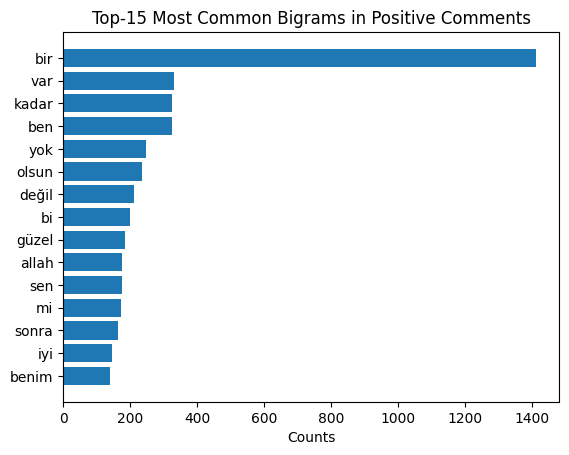

In [ ]:
plot_grams(process_text(dataset_train))

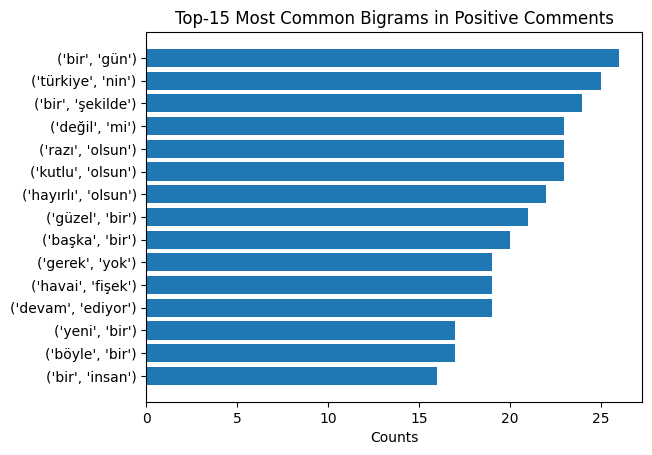

In [ ]:
plot_grams(process_text(dataset_train, gram='bi'))

#### Negative class - Unigram & Bigram

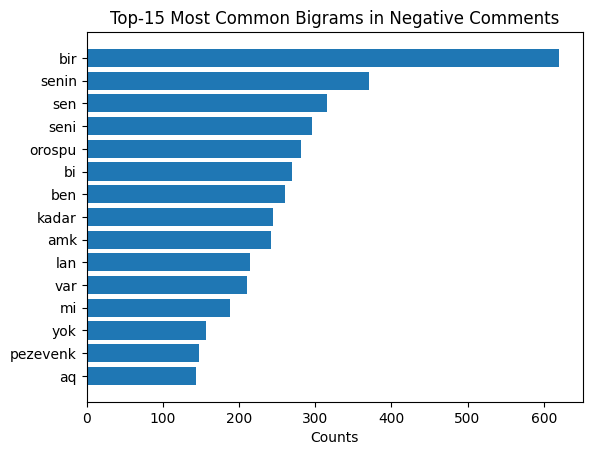

In [ ]:
plot_grams(process_text(dataset_train, label=0), sentiment='negative')

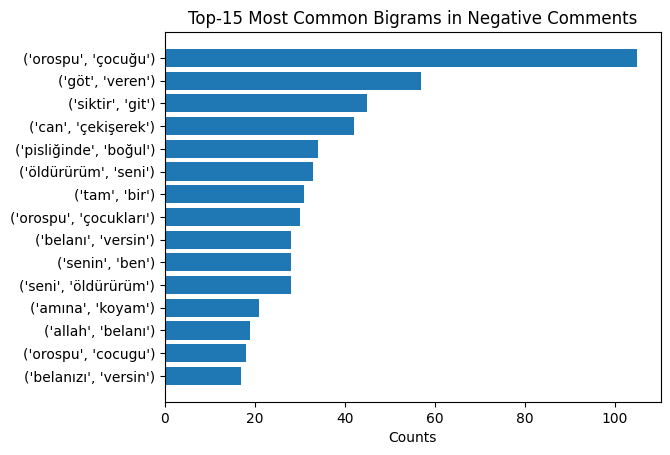

In [ ]:
plot_grams(process_text(dataset_train, label=0, gram='bi'), sentiment='negative')

### DistilBERT Model fine-tuning 

In [13]:
from transformers import AutoModel, AutoTokenizer

# Load pretrained model/tokenizer
tokenizer = AutoTokenizer.from_pretrained("dbmdz/distilbert-base-turkish-cased")

In [ ]:
def plot_sentence_embeddings_length(text_list, tokenizer):
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t), text_list))
    tokenized_texts_len = list(map(lambda t: len(t), tokenized_texts))
    fig, ax = plt.subplots(figsize=(8, 5));
    ax.hist(tokenized_texts_len, bins=40);
    ax.set_xlabel("Length of Comment Embeddings");
    ax.set_ylabel("Number of Tweets");
    return

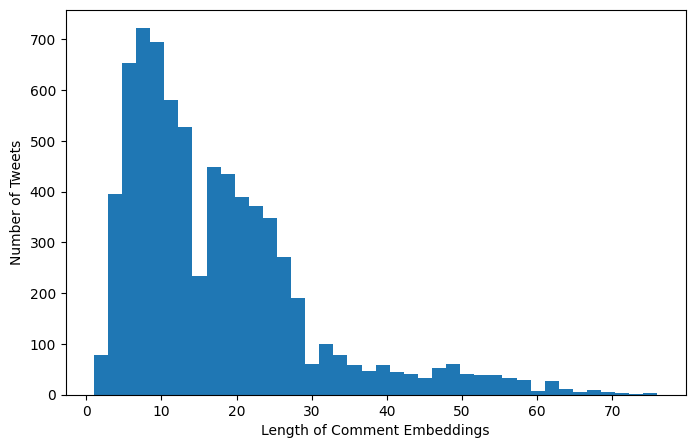

In [ ]:
plot_sentence_embeddings_length(train_texts, tokenizer)

In [14]:
train_encodings = tokenizer.batch_encode_plus(train_texts, max_length=128, add_special_tokens=True, return_attention_mask=True, pad_to_max_length=True, truncation=True)
val_encodings = tokenizer.batch_encode_plus(val_texts, max_length=128, add_special_tokens=True, return_attention_mask=True, pad_to_max_length=True, truncation=True)

/Users/yavuzsunor/anaconda3/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2360: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [36]:
print(train_encodings['input_ids'][0][:13])
print(train_encodings['attention_mask'][0][:13])

[2, 9485, 26450, 2927, 8058, 9315, 2073, 3600, 10436, 3, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


In [37]:
tokenizer.decode(token_ids = train_encodings['input_ids'][1])

'[CLS] orospu çocuğu çıkıp kameraya ağlamayı biliyor [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [15]:
class MakeTensor(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [16]:
train_dataset = MakeTensor(train_encodings, train_labels)
val_dataset = MakeTensor(val_encodings, val_labels)
# test_dataset = MakeTensor(test_encodings, test_labels)

In [29]:
len(train_dataset.encodings['input_ids'])

7226

In [34]:
np.array(train_dataset.encodings['input_ids']).shape

(7226, 128)

In [30]:
len(train_dataset.encodings['attention_mask'])

7226

In [33]:
len(train_dataset.labels)

7226

In [19]:
from torch.utils.data import DataLoader

In [20]:
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

#### Load the DistilBERT Turkish language model

In [21]:
model = AutoModel.from_pretrained("dbmdz/distilbert-base-turkish-cased").to("cuda")

Some weights of the model checkpoint at dbmdz/distilbert-base-turkish-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
def get_features(data_loader):
  for i, batch in enumerate(data_loader):
    with torch.no_grad():
      input_ids = batch['input_ids'].to('cuda')
      attention_mask = batch['attention_mask'].to('cuda')          
      last_hidden_states = model(input_ids, attention_mask)
      cls_tokens = last_hidden_states[0][:,0,:].cpu().numpy()
      if i == 0:
        features = cls_tokens
      else:
        features = np.append(features, cls_tokens, axis=0)

  return features

In [43]:
# Check the type and structure of the batches
for i, batch in enumerate(train_loader):
    with torch.no_grad():
      input_ids = batch['input_ids'].to('cuda')
      attention_mask = batch['attention_mask'].to('cuda')
      foo_hidden_state = model(input_ids, attention_mask)
      print(foo_hidden_state[0].shape)
    break
print(type(input_ids))
print(input_ids.shape)
print(attention_mask.shape)
input_ids

torch.Size([256, 128, 768])
<class 'torch.Tensor'>
torch.Size([256, 128])
torch.Size([256, 128])


tensor([[    2, 20104,  1009,  ...,     0,     0,     0],
        [    2, 31662,  6331,  ...,     0,     0,     0],
        [    2,  5165,  9094,  ...,     0,     0,     0],
        ...,
        [    2,  2883,  1996,  ...,     0,     0,     0],
        [    2, 11125, 12960,  ...,     0,     0,     0],
        [    2, 15439,  9031,  ...,     0,     0,     0]], device='cuda:0')

#### Get the embeddings for each set

In [54]:
features_tr = get_features(train_loader)
features_vl = get_features(val_loader)
# features_ts = get_features(test_loader)

In [55]:
# shape of the final feature sets
print(features_tr.shape)
print(features_vl.shape)
# print(features_ts.shape)

(7226, 768)
(3891, 768)


### Train benchmark models using the embeddings 

In [56]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(features_tr, train_labels)
print('train score:',lr_clf.score(features_tr, train_labels))
print('validation score:',lr_clf.score(features_vl, val_labels))
# print('test score:',lr_clf.score(features_ts, test_labels))

train score: 0.8180182673678383
validation score: 0.8057054741711642


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(features_tr, train_labels)
print('train score:',gnb.score(features_tr, train_labels))
print('validation score:',gnb.score(features_vl, val_labels))
# print('test score:',gnb.score(features_ts, test_labels))

train score: 0.5254636036534736
validation score: 0.5242868157286045


In [ ]:
import tensorflow as tf

# import tensorflow_hub as hub
# from tensorflow import keras
from tensorflow.keras.layers import Input,concatenate,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input1 = Input(shape=(features_tr.shape[1],))
dense1 = Dense(128,activation='relu')(input1)
dense2 = Dense(1,activation='sigmoid')(dense1)
tfmodel = Model(inputs=input1,outputs=dense2)

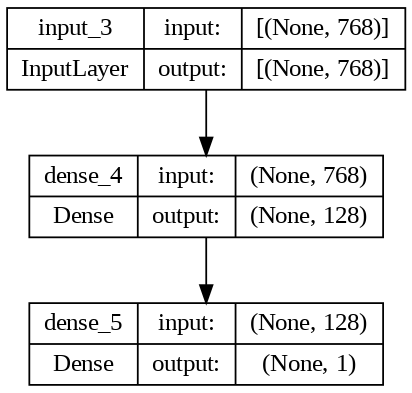

In [ ]:
tf.keras.utils.plot_model(tfmodel, show_shapes=True, dpi=128)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy (from_logits=False)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=1e-3/32)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
tfmodel.compile(optimizer=optimizer, loss=[loss, loss],metrics=["accuracy"])

checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')

fine_history = tfmodel.fit(features_tr, np.array(train_labels), validation_data=(features_vl, np.array(val_labels)),
                          epochs=10, callbacks=[checkpoint, earlystopping],batch_size=32,verbose=1)

Epoch 1/10
226/226 [==============================] - 4s 10ms/step - loss: 0.5877 - accuracy: 0.6911 - val_loss: 0.5655 - val_accuracy: 0.7325
Epoch 2/10
226/226 [==============================] - 3s 11ms/step - loss: 0.5568 - accuracy: 0.7318 - val_loss: 0.5619 - val_accuracy: 0.7371
Epoch 3/10
226/226 [==============================] - 2s 10ms/step - loss: 0.5549 - accuracy: 0.7333 - val_loss: 0.5608 - val_accuracy: 0.7332


### Inference to predict tweet samples

#### Clean up the tweets

In [88]:
import re
from zemberek import (TurkishMorphology,
                      TurkishSentenceNormalizer,
                      TurkishSpellChecker,
                      )
morphology = TurkishMorphology.create_with_defaults()
normalizer = TurkishSentenceNormalizer(morphology)

INFO:zemberek.morphology.turkish_morphology:TurkishMorphology instance initialized in 11.705437898635864


2023-05-10 21:20:29,277 - zemberek.morphology.turkish_morphology - INFO
Msg: TurkishMorphology instance initialized in 11.705437898635864



In [98]:
emoji_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags = re.UNICODE)

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = re.sub("'", "", tweet) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9iığüşöç]+","", temp)
    temp = re.sub("#[A-Za-z0-9iığüşöç]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = emoji_pattern.sub(r'',temp) 
#     temp = re.sub("[^a-z0-9İığüşöç]"," ", temp)
    temp = temp.split()
#     temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [100]:
raw_tweets = [
    'Özgür ve temiz bir turkiye icin 🇹🇷\n#SanaSoz \n#SanaSozBaharlarGelecek \n#cezevindenseskaydi \n#bizdendesanasoz \n#kilicdaroglu \n#GenelAf \n#infazduezenlemesi \n#ADALET \n#af \n#MilletTarihYazacak \n#Milletİttifakı https://t.co/9hhKFNftGs',
    'İşte bu! Türkiye’me yeni bir nefes #kılıçdaroğlu https://t.co/APxXlsvV4l',
    'MüslümanızElhamdürillah\nkalkıp da terörisİTlerin desteklediği yalamalara OY verirmiyiz\nkatiLLErin ittifakçılarına OY verirmiyiz\nİnsanız Biz,beynimiz var Allah akılfikir ihsan eylemiş\nanguSdeğilik\nKuranıkerim yakan bebek katillerine OY istiyor kasetci #Kılıçdaroğlu  ve adaylarda👇 https://t.co/n5hAsxKRqb',
    'Şimdi #HaberGlobal; İçişleri bakanı #Soylu, \n-#Demirtaş\'ın #PKK\'ya "silah bıraktırma" çıkışı örgüte nefeslenme numarasıdır, diyor.\nBu doğru değil..\nPKK ilk defa #Sevr\'deki bölünme projesi\'ni #Kılıçdaroğlu ve #Milletittifakı yapılanmasıyla güçlü olrk yakalamıştır, buna oynuyor https://t.co/ppiazSatHI',
    'İhanetin arkasında #emperyalizm ile işbirliği yapan #Türksolu var.\n-09 temmuz 1934 1.Kürdoloji kongresi"\n-1955 Moskova Komünist yazarlar kongresi\n-1978 Lice, Fis köyü #PKK\'nın kuruluşu.\nBu iğrenç sol, #Kılıçdaroğlu ile harekete geçti.. https://t.co/feD6TwpwiF',
    'Ne diyor #Kılıçdaroğlu; "#Kürtkimliği\'ni meclise kabul ettireceğim, #yerelyönetimler yasasını çıkaracağım". Bu sinsi bir Sevr çıkışıdır\n#Sevr\'i imzlayanlar "vatan haini" ilan edilmiştir.\nBu ihaneti #Atatürk ve arkadaşları "Kurtuluş savaşı" sonrası #Lozan\'da yırtıp atmışlardır. https://t.co/JJJWQ2M8kW',
    'Kılıçdaroğlu Bu Sefer Çok Güçlü. #kılıçdaroğlu #chp https://t.co/JgSoLgI1da @YouTube aracılığıyla',
    "@__KESAFET64__ #Kılıçdaroğlu’na oy yok👎🏻",
    '#MuhammetYakut #Tether\n#kilicdaroglu #ibbguvenligizambekliyor %4 zam %300 enflasyon bu gidiş nereye',
    "Kılıçdaroğlu 'Alevi' notuyla paylaştığı videoda ilk kez oy kullanacak gençlere seslendi \nhttps://t.co/nFj6WBQhxT \n#kılıçdaroğlu #alevi https://t.co/l63u311gYD",
    'Optimar, İlk kez oy kullanacak gençlerin nabzının tutulduğu anketinin sonuçlarını yayınladı:   📷 % 51,2 Erdoğan,  📷 % 39,2 Kılıçdaroğlu   📷 % 7,4 Muharrem İnce  📷 % 1,1 Sinan Oğan  \n\n#anket #optimar #seçim2023 #erdoğan #kılıçdaroğlu #ince #oğan https://t.co/NE2ORt22E4',
    'Optimar, İlk kez oy kullanacak gençlerin nabzının tutulduğu anketinin sonuçlarını yayınladı:  \n📷 % 51,2 Erdoğan, \n📷 % 39,2 Kılıçdaroğlu  \n📷 % 7,4 Muharrem İnce \n📷 % 1,1 Sinan Oğan\n\n#anket #optimar #seçim2023 #erdoğan #kılıçdaroğlu #ince #oğan https://t.co/vzMPbnh3rT'
]

In [102]:
tweet_samples = []
for tweet in raw_tweets:
  tweet_samples.append(normalizer.normalize(clean_tweet(tweet))) 
tweet_samples

<ipython-input-98-303cb65ce918>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['özgür ve temiz bir türkiye için ittifakı',
 'işte bu türkiyeme yeni bir nefes',
 'müslümanizelhamdürillah kalkıp da teröristlerin desteklediği yalamalara oy verir miyiz katillerin ittifakçılarına oy verir miyiz insanız biz , beynimiz var allah akılfikir ihsan eylemiş angusdeğilik kuranıkerim yakan bebek katillerine oy istiyor kasetçi ve adaylarda',
 'şimdi ; içişleri bakanı , - " silah bıraktırma " çıkışı örgüte nefeslenme numarasıdır , diyor . bu doğru değil . . pkk ilk defa bölünme projesini ve yapılanmasıyla güçlü olarak yakalamıştır , buna oynuyor',
 'ihanetin arkasında ile işbirliği yapan var . -09 temmuz 1934 1. kürdoloji kongresi " -1955 moskova komünist yazarlar kongresi -1978 lice , fiş köyü kuruluşu . bu iğrenç sol , ile harekete geçti . .',
 'ne diyor ; " meclise kabul ettireceğim , yasasını çıkaracağım " . bu sinsi bir sevr çıkısıdır imzalayanlar " vatan haini " ilan edilmiştir . bu ihaneti ve arkadaşları " kurtuluş savaşı " sonrası yırtıp atmışlardır .',
 'kılıçdaroğlu b

In [103]:
test_encodings = tokenizer.batch_encode_plus(tweet_samples, 
                                             max_length=128, 
                                             add_special_tokens=True, 
                                             return_attention_mask=True, 
                                             pad_to_max_length=True, 
                                             truncation=True)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [109]:
tokenizer.decode(token_ids = test_encodings['input_ids'][0])

'[CLS] özgür ve temiz bir türkiye için ittifakı [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [72]:
print(test_encodings['input_ids'][0][:13])
print(test_encodings['attention_mask'][0][:13])

[2, 4742, 1992, 3477, 1996, 13604, 2058, 13604, 10618, 1048, 3, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


#### Predicting with Logistic Regression

In [110]:
for i in range(len(test_encodings['input_ids'])):
  with torch.no_grad():
    test_input = torch.tensor(test_encodings['input_ids'][i]).to('cuda')
    test_attention = torch.tensor(test_encodings['attention_mask'][i]).to('cuda')
    last_hidden_state = model(test_input[None,:], test_attention[None,:])
    cls_token = last_hidden_state[0][:,0,:].cpu().numpy()
    if i == 0:
      test_features = cls_token
    else:
      test_features = np.append(test_features, cls_token, axis=0)

predictions = lr_clf.predict_proba(test_features)

for i, text in enumerate(tweet_samples):
  print(text)
  print("prob of being positive:", predictions[i][1], '\n')

özgür ve temiz bir türkiye için ittifakı
prob of being positive: 0.9214828733872201 

işte bu türkiyeme yeni bir nefes
prob of being positive: 0.5256655868871485 

müslümanizelhamdürillah kalkıp da teröristlerin desteklediği yalamalara oy verir miyiz katillerin ittifakçılarına oy verir miyiz insanız biz , beynimiz var allah akılfikir ihsan eylemiş angusdeğilik kuranıkerim yakan bebek katillerine oy istiyor kasetçi ve adaylarda
prob of being positive: 0.25324038419934325 

şimdi ; içişleri bakanı , - " silah bıraktırma " çıkışı örgüte nefeslenme numarasıdır , diyor . bu doğru değil . . pkk ilk defa bölünme projesini ve yapılanmasıyla güçlü olarak yakalamıştır , buna oynuyor
prob of being positive: 0.7833471352203267 

ihanetin arkasında ile işbirliği yapan var . -09 temmuz 1934 1. kürdoloji kongresi " -1955 moskova komünist yazarlar kongresi -1978 lice , fiş köyü kuruluşu . bu iğrenç sol , ile harekete geçti . .
prob of being positive: 0.6464728541697184 

ne diyor ; " meclise kabul ett